In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import uproot

In [3]:
file_path = "/global/cfs/cdirs/m3443/data/UnsupervisedLearning/AnomalyDetection/output_testQCD_NNVX.root"
tree = uproot.open(file_path)

In [4]:
keys = tree.keys()

In [5]:
keys

['ProcessID0;1', 'Delphes;1']

## Overall Dataset

In [6]:
# load data, keys = ['ProcessID0;1', 'Delphes;1']
data = tree['Delphes;1']
data.keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.ReadTime',
 'Event/Event.ProcTime',
 'Event/Event.ProcessID',
 'Event/Event.MPI',
 'Event/Event.Weight',
 'Event/Event.CrossSection',
 'Event/Event.CrossSectionError',
 'Event/Event.Scale',
 'Event/Event.AlphaQED',
 'Event/Event.AlphaQCD',
 'Event/Event.ID1',
 'Event/Event.ID2',
 'Event/Event.X1',
 'Event/Event.X2',
 'Event/Event.ScalePDF',
 'Event/Event.PDF1',
 'Event/Event.PDF2',
 'Event_size',
 'Weight',
 'Weight/Weight.fUniqueID',
 'Weight/Weight.fBits',
 'Weight/Weight.Weight',
 'Weight_size',
 'Track',
 'Track/Track.fUniqueID',
 'Track/Track.fBits',
 'Track/Track.PID',
 'Track/Track.vxTruth',
 'Track/Track.Charge',
 'Track/Track.P',
 'Track/Track.PT',
 'Track/Track.Eta',
 'Track/Track.Phi',
 'Track/Track.CtgTheta',
 'Track/Track.EtaOuter',
 'Track/Track.PhiOuter',
 'Track/Track.T',
 'Track/Track.X',
 'Track/Track.Y',
 'Track/Track.Z',
 'Track/Track.TOuter',
 'Track/Track.XOuter',
 'Trac

Let's explore the objects in each event. We have 6 types of data:
- Event-level data (e.g. cross-section and weighting, but also we will hand-engineer event-level features from lower-level data)
- Track-level data (e.g. transverse momentum (pT), pseudorapidity (eta), azimuthal angle (phi), charge, number of hits, etc.)
- Hit-level data (e.g. r, phi, z)
- Vertex-level data (e.g. x, y, z)
- Displaced-vertex-level data (e.g. x, y, z)
- Weight-level data

## Event-level Data

In [7]:
event_number_array = data["Event"]["Event.Number"].array()
event_number_np_array = np.array(event_number_array)

In [8]:
event_number_np_array.shape

(100000, 1)

Presumably, the event number is repeated across runs, as there are only 1000 unique event IDs

In [9]:
np.unique(event_number_np_array, return_counts=True)

(array([   0,    1,    2, ..., 9997, 9998, 9999]),
 array([10, 10, 10, ..., 10, 10, 10]))

In [10]:
for key in data["Event"].keys():
    print(key)
    values, counts = np.unique(data["Event"][key].array(), return_counts=True)
    print("Values", values)
    print("Counts", counts)

Event.fUniqueID
Values [0]
Counts [100000]
Event.fBits
Values [50331648]
Counts [100000]
Event.Number
Values [0, 1, 2, 3, 4, 5, 6, 7, 8, ..., 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999]
Counts [10, 10, 10, 10, 10, 10, 10, 10, 10, ..., 10, 10, 10, 10, 10, 10, 10, 10, 10]
Event.ReadTime
Values [0.000125, 0.000131, 0.000133, 0.000135, ..., 0.00613, 0.0105, 0.0153, 0.0691]
Counts [2, 1, 1, 1, 2, 1, 2, 5, 4, 4, 3, 2, 2, ..., 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Event.ProcTime
Values [0.00546, 0.0056, 0.0056, 0.00562, 0.00568, ..., 7.71, 8, 8.2, 8.28, 8.35]
Counts [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Event.ProcessID
Values [111, 112, 113, 114, 115, 116, 121, 122]
Counts [62070, 580, 33380, 3790, 30, 20, 120, 10]
Event.MPI
Values [-1]
Counts [100000]
Event.Weight
Values [1, 1.01, 1.02, 1.02, 1.03]
Counts [1e+05, 10, 10, 10, 10]
Event.CrossSection
Values [6.87e+03, 1.37e+04, 2.06e+04, 2.75e+04, ..., 6.87e+07, 6.87e+07, 6.87e+07]
Counts [10, 10, 10

The first thing will be to ensure that although we have repeated event configurations, that the underlying data is not repeated!

## Track-level Data

In [53]:
for key in data["Track"].keys():
    print(key)
    try:
        track_values = data["Track"][key].array()
        print("Values", track_values)
        print("Length", len(track_values))
    except:
        print("Values", "Not able to be loaded")

Track.fUniqueID
Values [[157, 158, 159, 160, 161, 162, 163, ..., 197, 198, 201, 202, 232, 233], ...]
Length 100000
Track.fBits
Values Not able to be loaded
Track.PID
Values [[-211, 2212, -211, 211, -211, 211, ..., 211, -211, 211, -211, 211, -211], ...]
Length 100000
Track.vxTruth
Values [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ...]
Length 100000
Track.Charge
Values [[-1, 1, -1, 1, -1, 1, 1, -1, -1, 1, ..., -1, -1, 1, 1, -1, 1, -1, 1, -1], ...]
Length 100000
Track.P
Values [[1.32e+03, 4.5e+03, 0.219, 0.286, 0.844, ..., 0.749, 0.515, 48, 30], ...]
Length 100000
Track.PT
Values [[0.312, 0.286, 0.164, 0.265, 0.611, ..., 0.463, 0.0858, 0.602, 0.267], ...]
Length 100000
Track.Eta
Values [[-9.05, -10.4, 0.797, 0.395, -0.847, ..., -0.818, 1.06, 2.48, 5.07, 5.42], ...]
Length 100000
Track.Phi
Values [[-3.13, -2.71, -2.24, -2.66, 1.01, ..., -0.838, -0.143, -0.0365, -3.11], ...]
Length 100000
Track.CtgTheta
Values [[-4.25e+03, -1.57e+04, 0.884, 0.406, -0.953, ...,

In [59]:
track_pts = data["Track"]["Track.PT"].array()
track_unique_ids = data["Track"]["Track.fUniqueID"].array()

In [62]:
test_event_tracks = track_pts[0]

We want to check that there isn't another event with these tracks!

In [69]:
for i, event_tracks in tqdm(enumerate(track_pts)):
    # Check that there isn't a repeat of test_event_tracks
    if np.array_equal(event_tracks, test_event_tracks):
        print("Repeat", i)

0it [00:00, ?it/s]

978it [00:00, 4888.51it/s]

Repeat 0


10898it [00:02, 4793.20it/s]

Repeat 10000


20925it [00:04, 4993.15it/s]

Repeat 20000


30541it [00:06, 5068.83it/s]

Repeat 30000


40628it [00:07, 5742.42it/s]

Repeat 40000


50872it [00:09, 5672.14it/s]

Repeat 50000


60956it [00:11, 5406.36it/s]

Repeat 60000


70623it [00:13, 6062.89it/s]

Repeat 70000


80971it [00:14, 5649.53it/s]

Repeat 80000


91030it [00:16, 5968.76it/s]

Repeat 90000


100000it [00:18, 5507.01it/s]


It looks like we are indeed getting 10 copies of each event. We will run this check on hits and vertices as well.

In [73]:
test_event_hits = data["Hits"]["Hits.r"].array()[0]

for i, event_hits in tqdm(enumerate(data["Hits"]["Hits.r"].array())):
    # Check that there isn't a repeat of test_event_tracks
    if np.array_equal(event_hits, test_event_hits):
        print("Repeat", i)

1107it [00:00, 5519.70it/s]

Repeat 0


100000it [00:18, 5267.31it/s]


Nope... No repeats... Although the hit content is VERY similar:

In [77]:
test_event_hits

<Array [0.0334, 0.0505, 0.0885, ..., 0.0918, 0.105, 0.116] type='178 * float32'>

In [78]:
data["Hits"]["Hits.r"].array()[10000]

<Array [0.0334, 0.0505, 0.0885, ..., 0.0955, 0.107] type='170 * float32'>

In [74]:
test_event_vertices = data["Vertex"]["Vertex.X"].array()[0]

for i, event_vertices in tqdm(enumerate(data["Vertex"]["Vertex.X"].array())):
    # Check that there isn't a repeat of test_event_tracks
    if np.array_equal(event_vertices, test_event_vertices):
        print("Repeat", i)

464it [00:00, 4630.55it/s]

928it [00:00, 4568.80it/s]

Repeat 0


10651it [00:02, 4894.22it/s]

Repeat 10000


20976it [00:04, 5607.29it/s]

Repeat 20000


31062it [00:06, 5188.09it/s]

Repeat 30000


41066it [00:07, 5623.31it/s]

Repeat 40000


50944it [00:09, 4674.10it/s]

Repeat 50000


60721it [00:11, 4851.51it/s]

Repeat 60000


70836it [00:14, 4765.52it/s]

Repeat 70000


80562it [00:16, 4973.89it/s]

Repeat 80000


91047it [00:18, 5319.26it/s]

Repeat 90000


100000it [00:19, 5050.51it/s]


Okay, the takeaway is that 10 copies of each event is being generated. But since they are generated seperately, they are not **exactly** identical. Even so, event 1 and event 10001 represent the same physics, and we should be extremely careful about one ending up in a training dataset and one ending up in a test dataset. Let's solve this in the future by generating more unique events.

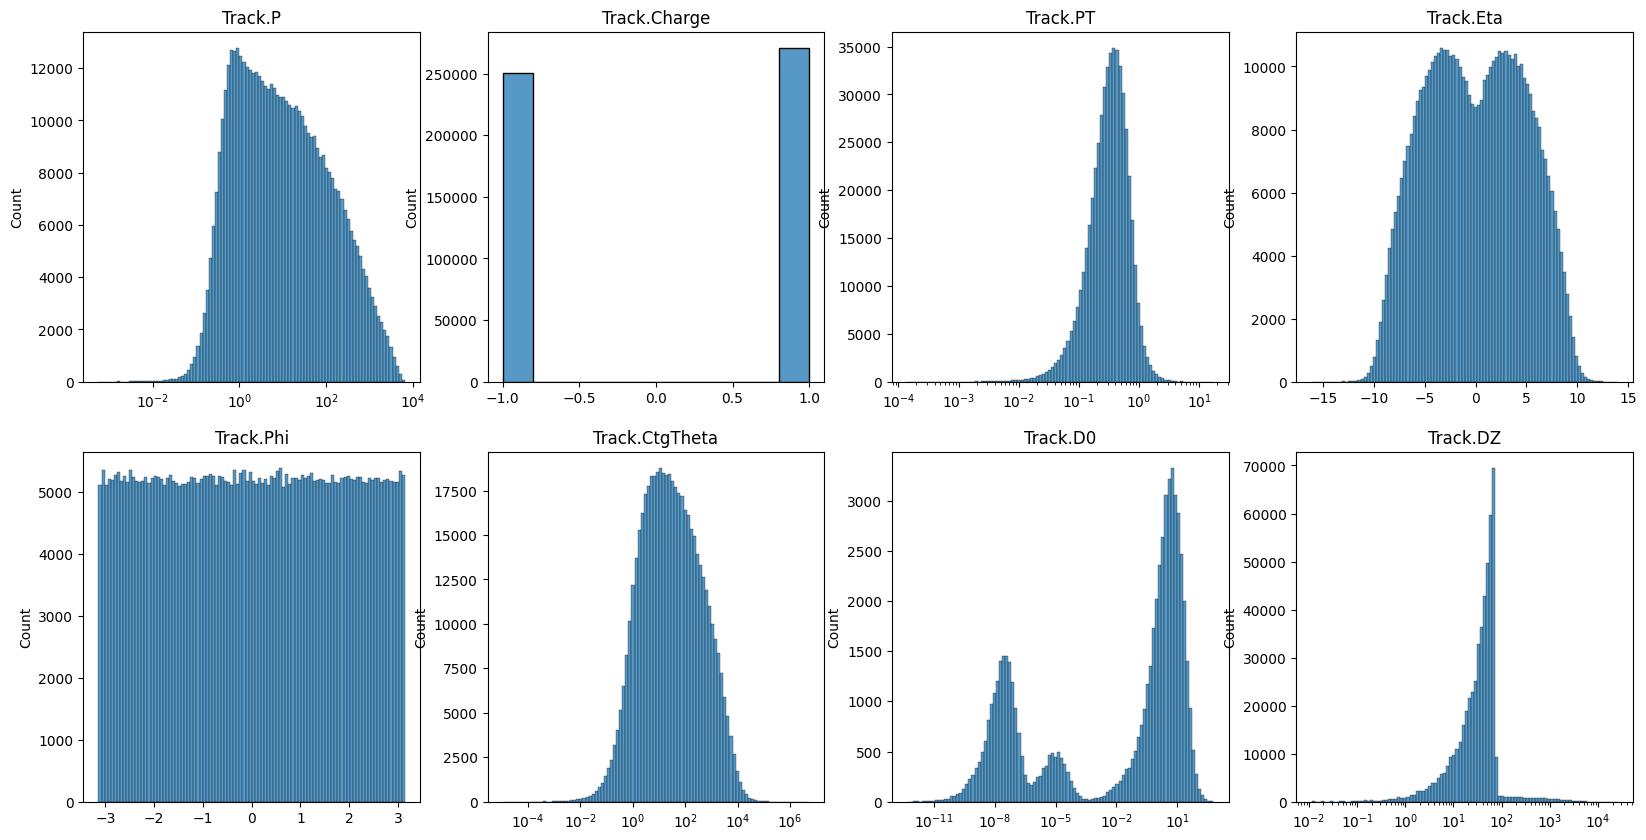

In [22]:
track_values_p = np.concatenate(data["Track"]["Track.P"].array()[:10000])
track_values_charge = np.concatenate(data["Track"]["Track.Charge"].array()[:10000])
track_values_pt = np.concatenate(data["Track"]["Track.PT"].array()[:10000])
track_values_eta = np.concatenate(data["Track"]["Track.Eta"].array()[:10000])
track_values_phi = np.concatenate(data["Track"]["Track.Phi"].array()[:10000])
track_values_ctgtheta = np.concatenate(data["Track"]["Track.CtgTheta"].array()[:10000])
track_values_d0 = np.concatenate(data["Track"]["Track.D0"].array()[:10000])
track_values_dz = np.concatenate(data["Track"]["Track.DZ"].array()[:10000])

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
# Add title to plot
sns.histplot(track_values_p, ax=axs[0, 0], bins=100, log_scale=True)
axs[0, 0].set_title("Track.P")
sns.histplot(track_values_charge, ax=axs[0, 1], bins=10)
axs[0, 1].set_title("Track.Charge")
sns.histplot(track_values_pt, ax=axs[0, 2], bins=100, log_scale=True)
axs[0, 2].set_title("Track.PT")
sns.histplot(track_values_eta, ax=axs[0, 3], bins=100)
axs[0, 3].set_title("Track.Eta")
sns.histplot(track_values_phi, ax=axs[1, 0], bins=100)
axs[1, 0].set_title("Track.Phi")
sns.histplot(np.abs(track_values_ctgtheta), ax=axs[1, 1], bins=100, log_scale=True)
axs[1, 1].set_title("Track.CtgTheta")
sns.histplot(np.abs(track_values_d0), ax=axs[1, 2], bins=100, log_scale=True)
axs[1, 2].set_title("Track.D0")
sns.histplot(np.abs(track_values_dz), ax=axs[1, 3], bins=100, log_scale=True)
axs[1, 3].set_title("Track.DZ")
plt.show()


## Hit-level Data

In [23]:
for key in data["Hits"].keys():
    print(key)
    try:
        track_values = data["Hits"][key].array()
        print("Values", track_values)
        print("Length", len(track_values))
    except:
        print("Values", "Not able to be loaded")

Hits.fUniqueID
Values [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ...]
Length 100000
Hits.fBits
Values [[50331648, 50331648, 50331648, ..., 50331648, 50331648, 50331648], ..., [...]]
Length 100000
Hits.r
Values [[0.0334, 0.0505, 0.0885, 0.123, 0.299, ..., 0.0505, 0.0918, 0.105, 0.116], ...]
Length 100000
Hits.z
Values [[-0.0285, -0.0134, 0.0205, 0.0511, 0.221, ..., 0.242, 0.495, 0.58, 0.65], ...]
Length 100000
Hits.phi
Values [[-2.18, -2.15, -2.08, -2.02, -1.67, ..., 0.0341, 0.183, 0.233, 0.275], ...]
Length 100000
Hits.partIdx
Values [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..., 26, 26, 26, 26, 27, 27, 27, 27, 27], ...]
Length 100000
Hits.vxTruth
Values [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ...]
Length 100000


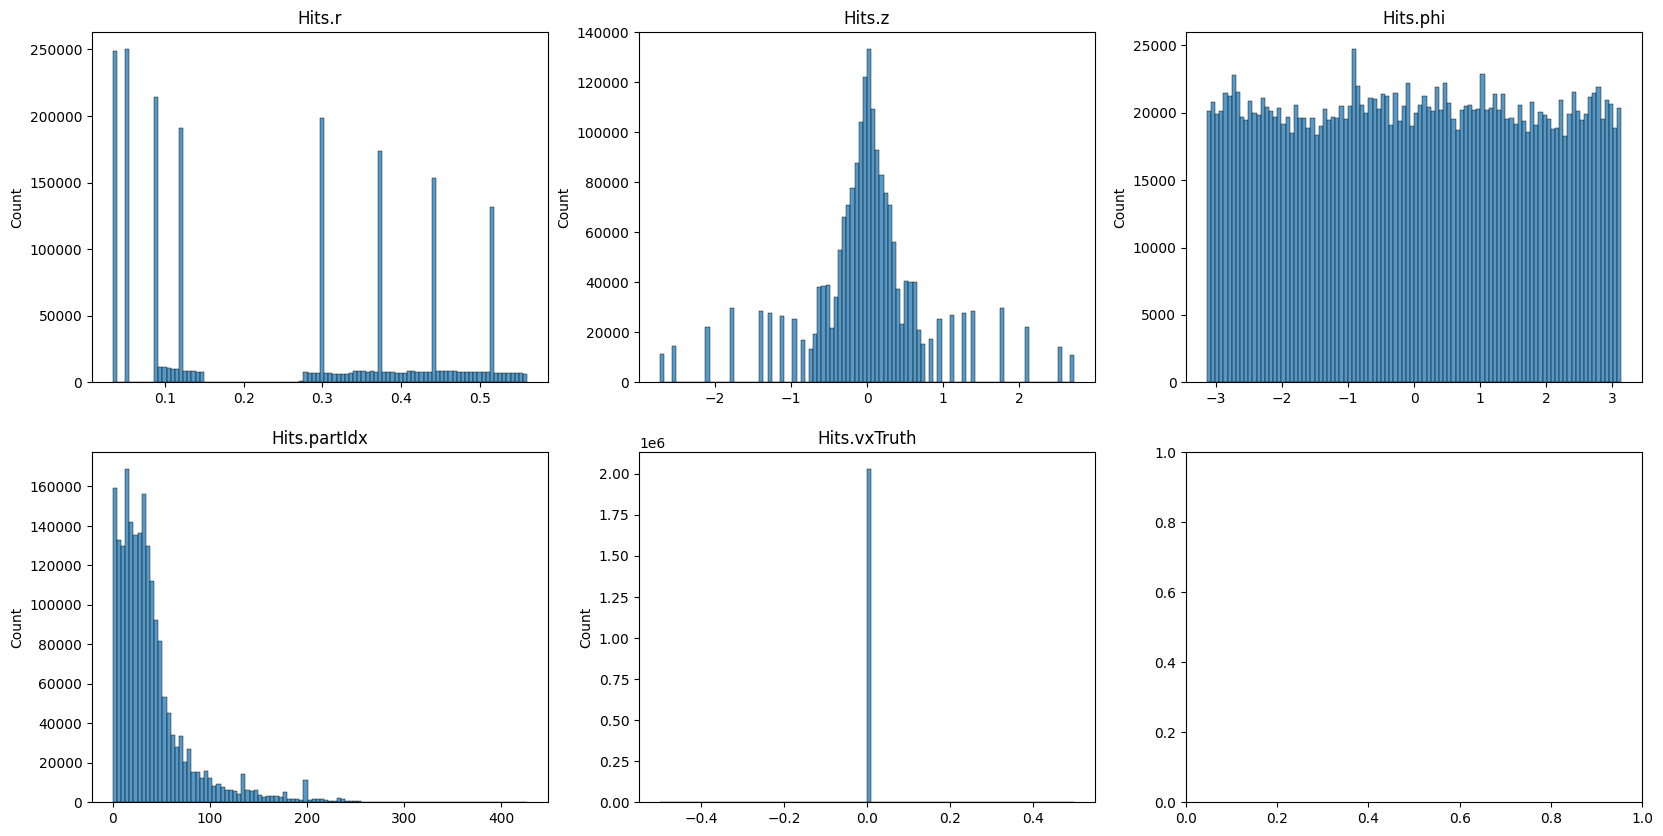

In [24]:
hit_values_r = np.concatenate(data["Hits"]["Hits.r"].array()[:10000])
hit_values_z = np.concatenate(data["Hits"]["Hits.z"].array()[:10000])
hit_values_phi = np.concatenate(data["Hits"]["Hits.phi"].array()[:10000])
hit_values_partIdx = np.concatenate(data["Hits"]["Hits.partIdx"].array()[:10000])
hit_values_vxTruth = np.concatenate(data["Hits"]["Hits.vxTruth"].array()[:10000])

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Add title to plot
sns.histplot(hit_values_r, ax=axs[0, 0], bins=100)
axs[0, 0].set_title("Hits.r")
sns.histplot(hit_values_z, ax=axs[0, 1], bins=100)
axs[0, 1].set_title("Hits.z")
sns.histplot(hit_values_phi, ax=axs[0, 2], bins=100)
axs[0, 2].set_title("Hits.phi")
sns.histplot(hit_values_partIdx, ax=axs[1, 0], bins=100)
axs[1, 0].set_title("Hits.partIdx")
sns.histplot(hit_values_vxTruth, ax=axs[1, 1], bins=100)
axs[1, 1].set_title("Hits.vxTruth")
plt.show()

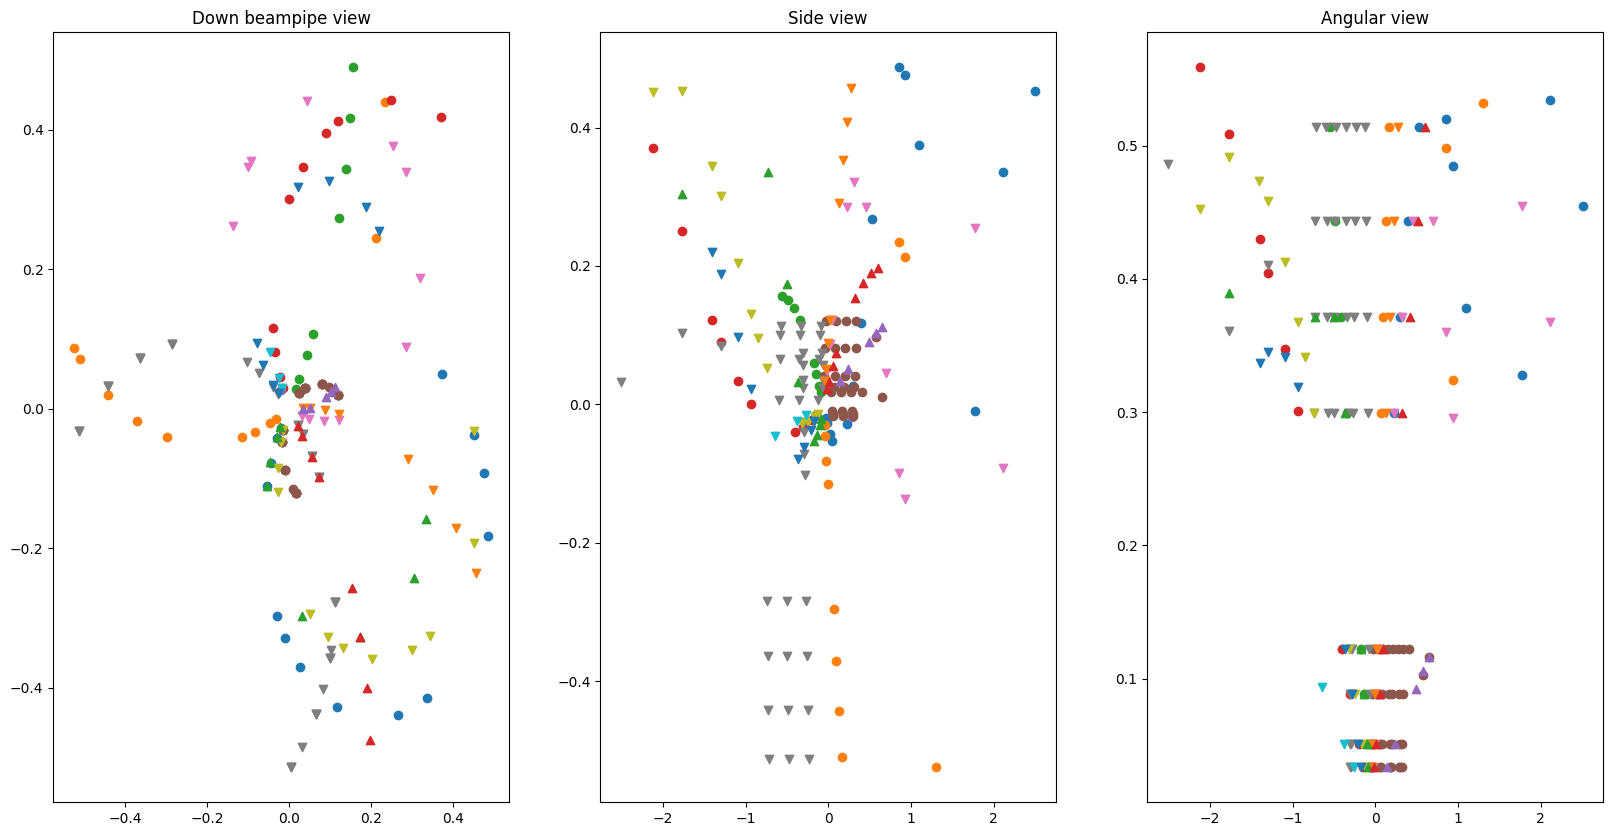

In [34]:
# Define a list of markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
unique_particle_ids = np.unique(sample_event_particle_id)

for i, particle_id in enumerate(unique_particle_ids):
    particle_id_mask = sample_event_particle_id == particle_id
    marker = markers[i // 6]  # Cycle through markers if there are more particle IDs than markers
    axs[0].scatter(sample_event_x[particle_id_mask], sample_event_y[particle_id_mask], marker=marker)
    axs[0].set_title("Down beampipe view")
    axs[1].scatter(sample_event_z[particle_id_mask], sample_event_x[particle_id_mask], marker=marker)
    axs[1].set_title("Side view")
    axs[2].scatter(sample_event_z[particle_id_mask], sample_event_r[particle_id_mask], marker=marker)
    axs[2].set_title("Angular view")